In [2]:
#Here, I am mounting and loading my file
import pandas as pd
import os
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
file_path= os.path.abspath(r"/content/drive/MyDrive/CustomerChurn_dataset.csv")
# Creating a variable with the name "df" that keeps the data
df= pd.read_csv(file_path)
df

Mounted at /content/drive


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


EXPLORATORY DATA ANALYSIS

In [3]:
# The customerID was removed because it is not really relevant in predicting the churn
remove_columns =['customerID']
df=df.drop(columns=remove_columns)


In [4]:
# Checking for values that have misssing values greater than 30 %
missing_percentage = (df.isnull().mean() * 100)

# I defined a threshold of 30% for the maximum allowed missing values
threshold = 30

# To get the list of columns with missing values exceeding the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

# dropping columns with excessive missing values from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
from numpy import NaN
for column in df.columns:
  df[column].replace(" ",np.NaN, inplace=True)

In [6]:
# Converting the column to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges']).astype(float)

# Identifying the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Identifying the numeric columns
numeric_columns = df.select_dtypes(exclude=['object']).columns

# Creating separate DataFrames for categorical and numeric data
categorical_data = df[categorical_columns]
numeric_data = df[numeric_columns]

In [7]:
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [8]:
numeric_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [9]:
#imputing the numeric and categorical data before the correlation
#Filling missing values in numeric data with the median.
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='median')
a=imp.fit_transform(numeric_data)
numeric_data_impute = pd.DataFrame(a,columns=numeric_columns)

# Filling missing values in categorical_data using forward fill (ffill)
categorical_data_imputed = categorical_data.fillna(method='ffill')

# Making sure the result is a DataFrame with the same column names
categorical_data_imputed = pd.DataFrame(categorical_data_imputed, columns=categorical_data.columns)

In [10]:
#Displaying the categorical_data_imputed and numeric_data_impute
categorical_data_imputed.info()
numeric_data_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  StreamingMovies   7043 non-null   object
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   object
 14  PaymentMethod     7043 non-null   object
 15  Churn             7043 non-null   object
dtypes: object(16)
memory usage: 880.5+ KB
<class 'pandas.core.fr

In [11]:
#Encoding the categorical data
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Looping through each column in the imputed categorical data
for col in categorical_data_imputed.columns:
    categorical_data_imputed[col] = label_encoder.fit_transform(categorical_data_imputed[col])

In [11]:
categorical_data_imputed

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [12]:
numeric_data_impute

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,29.85,29.85
1,0.0,34.0,56.95,1889.50
2,0.0,2.0,53.85,108.15
3,0.0,45.0,42.30,1840.75
4,0.0,2.0,70.70,151.65
...,...,...,...,...
7038,0.0,24.0,84.80,1990.50
7039,0.0,72.0,103.20,7362.90
7040,0.0,11.0,29.60,346.45
7041,1.0,4.0,74.40,306.60


In [13]:
import pandas as pd
# Combining the imputed numeric and label-encoded categorical data into a single DataFrame
df = pd.concat([numeric_data_impute, categorical_data_imputed], axis=1)

#df = pd.concat([pd.DataFrame(a, columns=numeric_data.columns), categorical_data_imputed], axis=1)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   float64
 1   tenure            7043 non-null   float64
 2   MonthlyCharges    7043 non-null   float64
 3   TotalCharges      7043 non-null   float64
 4   gender            7043 non-null   int64  
 5   Partner           7043 non-null   int64  
 6   Dependents        7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   int64  
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   int64  


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0.0,1.0,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0.0,34.0,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0.0,2.0,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0.0,45.0,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0.0,2.0,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,24.0,84.80,1990.50,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0.0,72.0,103.20,7362.90,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0.0,11.0,29.60,346.45,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1.0,4.0,74.40,306.60,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


EXTRACTING RELEVANT FEATURES

In [17]:
from sklearn.ensemble import RandomForestRegressor

#'X' is my feature matrix and 'y' is my target variable
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# Initializing a Random Forest Regressor
rf = RandomForestRegressor(random_state=32)

# Fitting the model to my data
rf.fit(X, y)

# Getting feature importances
feature_importances = rf.feature_importances_

# Creating a DataFrame to associate features with their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Setting a threshold of 0.2 for feature importance
threshold = 0.02  # You can adjust this value as needed

# Selecting and storing feature names with importances above the given threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

# Printing out the selected features
print("Selected Features based on Importance:")
print(selected_features)

Selected Features based on Importance:
['MonthlyCharges', 'TotalCharges', 'Contract', 'tenure', 'PaymentMethod', 'OnlineSecurity', 'gender', 'PaperlessBilling', 'TechSupport', 'Partner']


USING EDA TO FIND OUT WHICH CUSTOMER PROFILES RELATE TO CHURNING A LOT

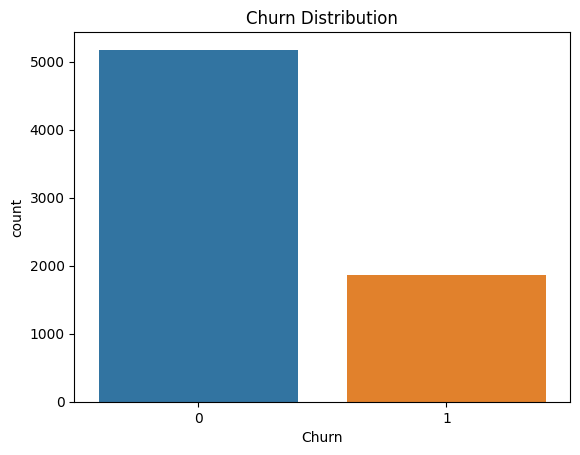

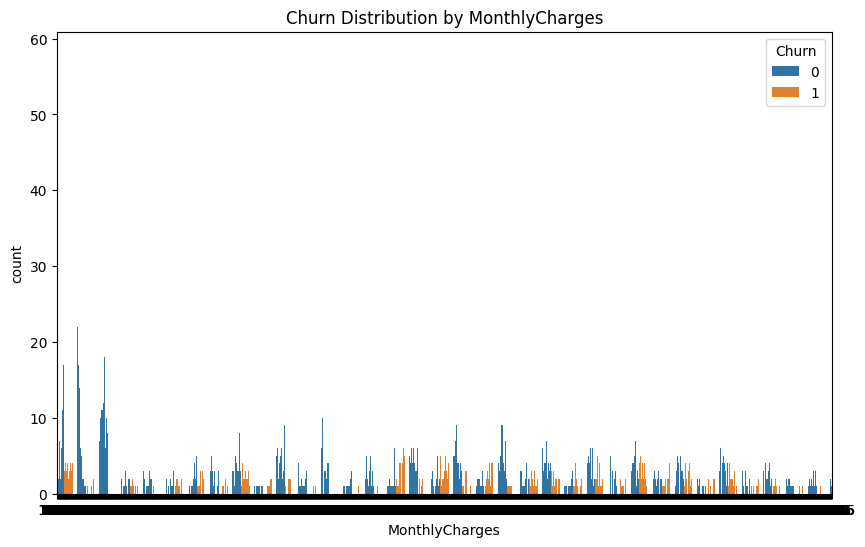

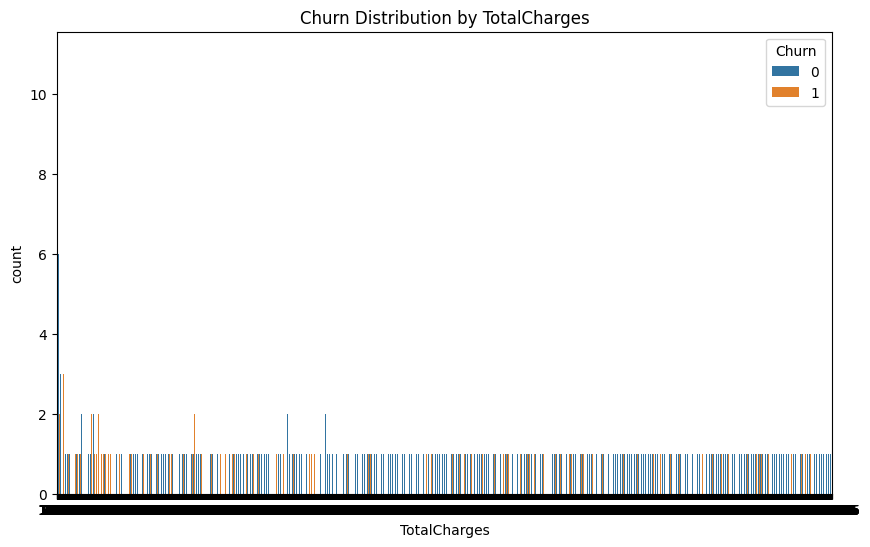

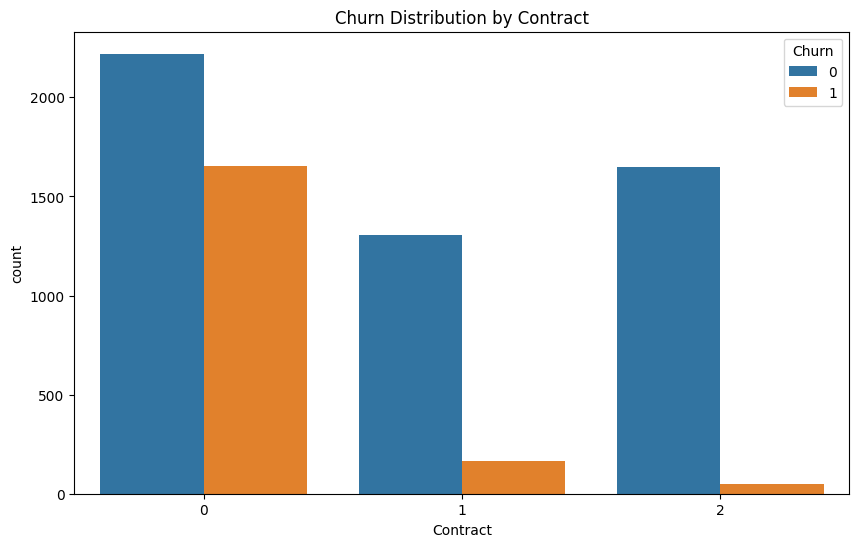

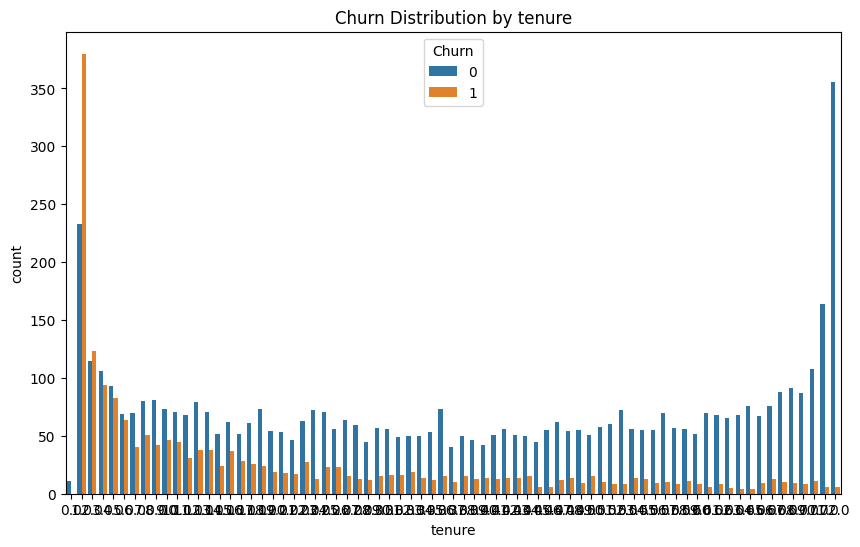

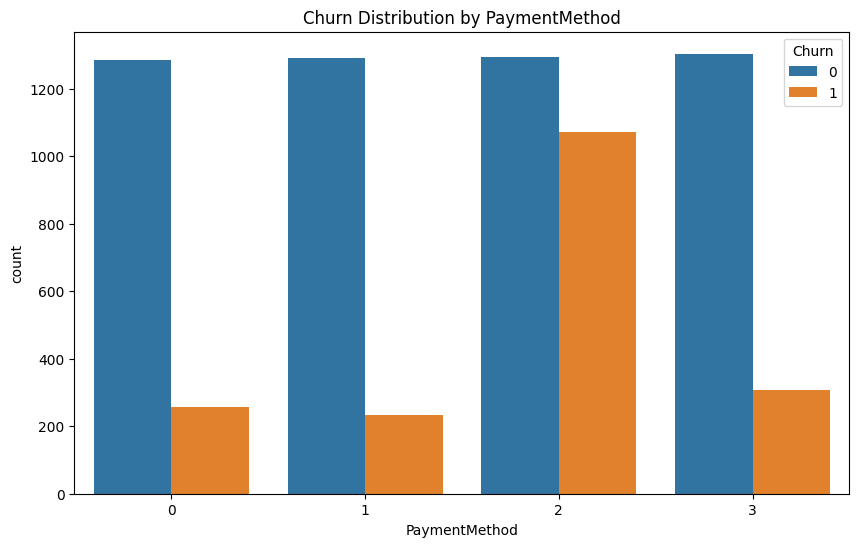

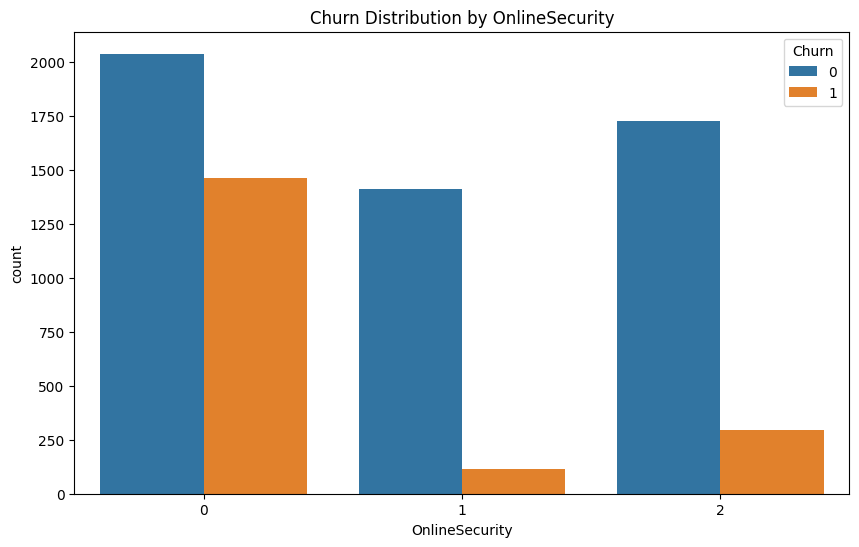

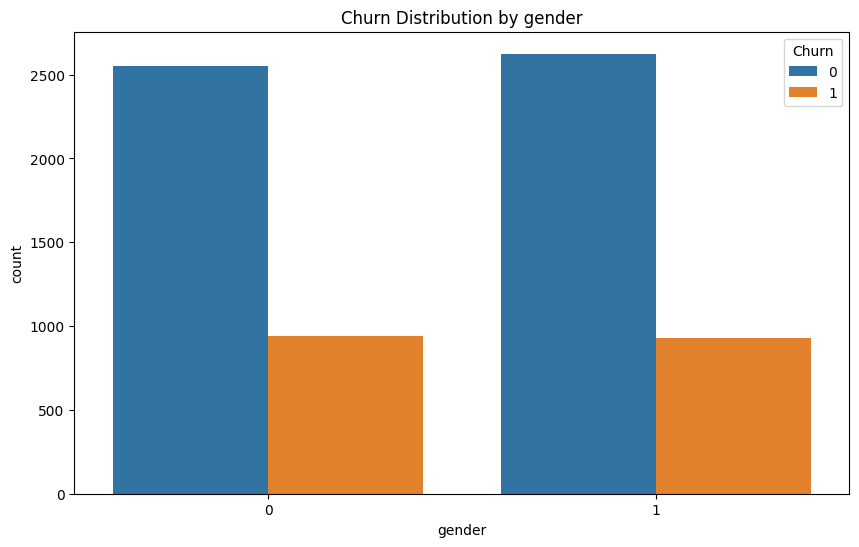

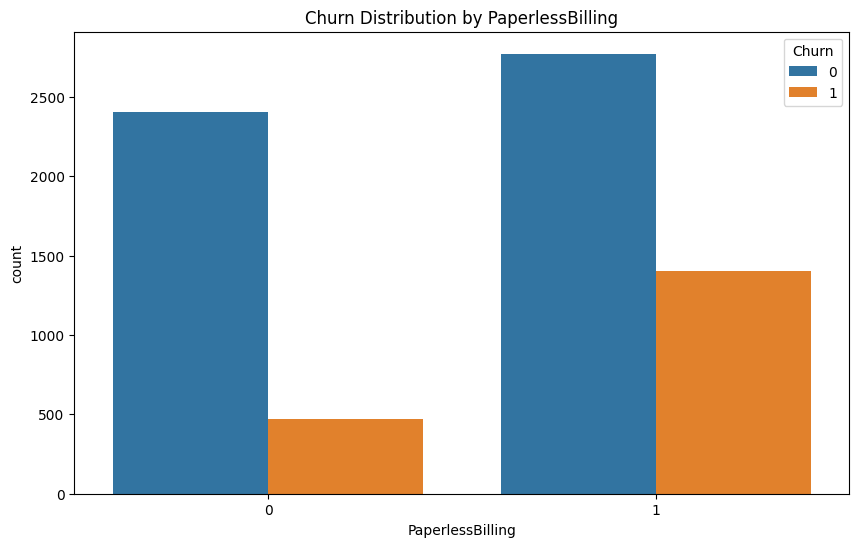

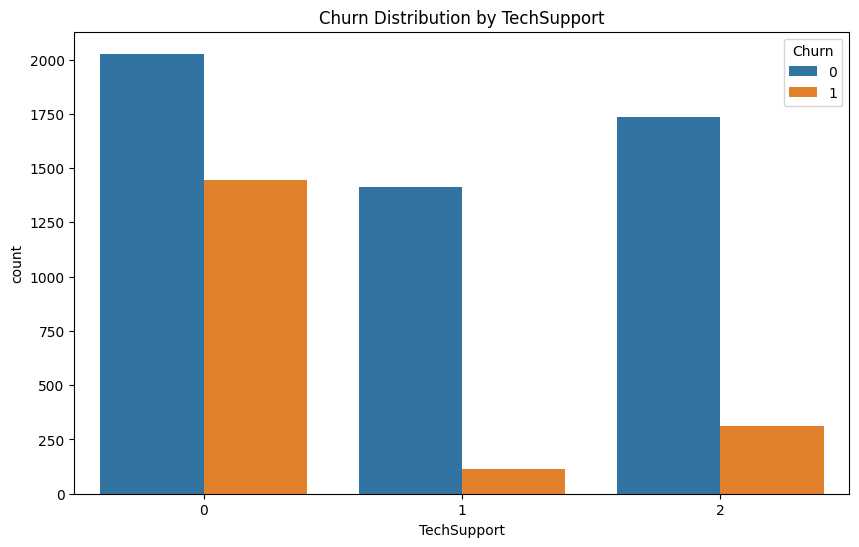

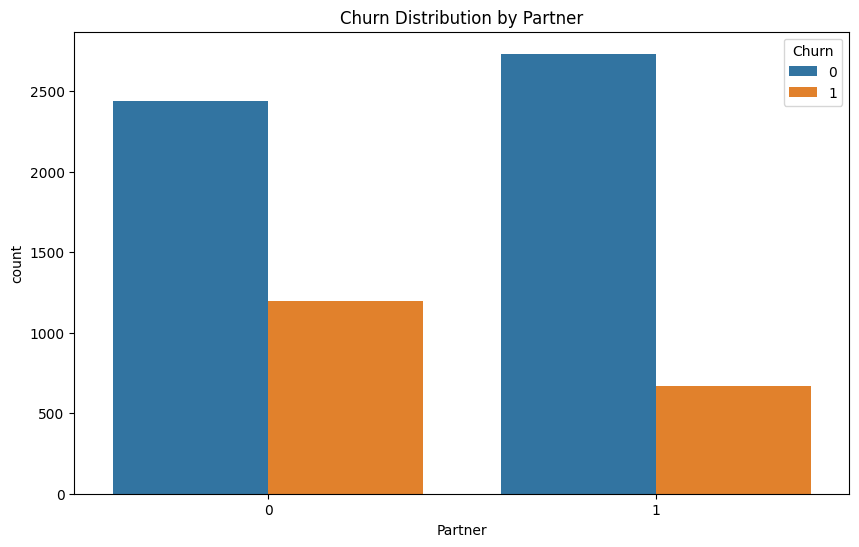

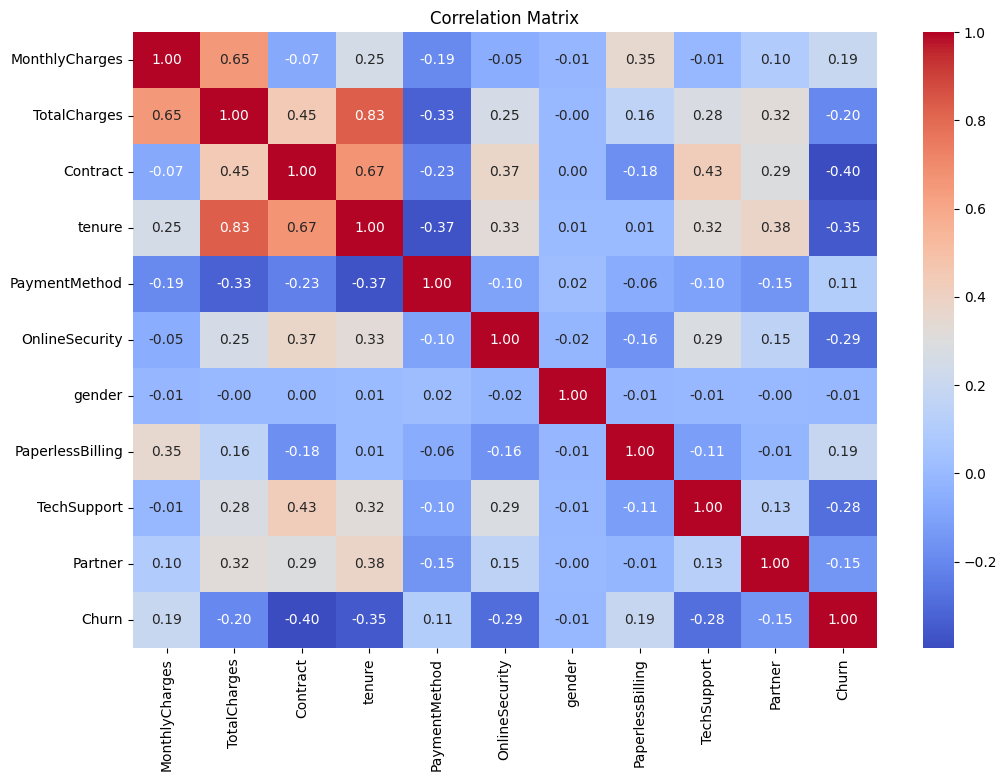

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA: Relationship between Churn and other features

# 1. Churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# 2. Exploring all the selected features vs. Churn
features_to_explore = ['MonthlyCharges', 'TotalCharges', 'Contract', 'tenure', 'PaymentMethod',
                       'OnlineSecurity', 'gender', 'PaperlessBilling', 'TechSupport', 'Partner']

for feature in features_to_explore:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Distribution by {feature}')
    plt.show()

# Correlation Matrix (to identify relationships between features)
correlation_matrix = df[features_to_explore + ['Churn']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Dropping non-selected features from the dataset
non_selected_features = [col for col in df.columns if col not in selected_features]

df.drop(non_selected_features, axis=1, inplace=True)
df

,tenure,MonthlyCharges,TotalCharges,gender,Partner,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod
0,1.0,29.85,29.85,0,1,0,0,0,1,2
1,34.0,56.95,1889.50,1,0,2,0,1,0,3
2,2.0,53.85,108.15,1,0,2,0,0,1,3
3,45.0,42.30,1840.75,1,0,2,2,1,0,0
4,2.0,70.70,151.65,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...
7038,24.0,84.80,1990.50,1,1,2,2,1,1,3
7039,72.0,103.20,7362.90,0,1,0,0,1,1,1
7040,11.0,29.60,346.45,0,1,2,0,0,1,2
7041,4.0,74.40,306.60,1,1,0,0,0,1,3


In [20]:
#assigning df to x
x=df

In [21]:
#scaling x
from sklearn.preprocessing import StandardScaler

# Creating an instance of StandardScaler
scaler = StandardScaler()

# Fitting the scaler to my x and transforming them
scaled = scaler.fit_transform(x)

In [22]:
scaled

array([[-1.27744458, -1.16032292, -0.99424194, ..., -0.8282069 ,
         0.8297975 ,  0.39855772],
       [ 0.06632742, -0.25962894, -0.17324413, ...,  0.37127103,
        -1.20511329,  1.33486261],
       [-1.23672422, -0.36266036, -0.95967407, ..., -0.8282069 ,
         0.8297975 ,  1.33486261],
       ...,
       [-0.87024095, -1.1686319 , -0.85446945, ..., -0.8282069 ,
         0.8297975 ,  0.39855772],
       [-1.15528349,  0.32033821, -0.87206242, ..., -0.8282069 ,
         0.8297975 ,  1.33486261],
       [ 1.36937906,  1.35896134,  2.01428802, ...,  1.57074896,
         0.8297975 , -1.47405205]])

In [23]:
#pickling the model #creating the scalar model
import pickle
# Save the scaler
with open("scaled.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Splitting the scaled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=42)

In [49]:
# Getting the feature names after scaling(this is to know the order when deploying)
feature_names_after_scaling = scaler.get_feature_names_out()

# Print the order of features
print("Feature Order after Scaling:", feature_names_after_scaling)

Feature Order after Scaling: ['tenure' 'MonthlyCharges' 'TotalCharges' 'gender' 'Partner'
 'OnlineSecurity' 'TechSupport' 'Contract' 'PaperlessBilling'
 'PaymentMethod']


In [25]:
#Checking the shape (dimensions) of the variable x_train
x_train.shape

(5634, 10)

In [26]:
#Checking the shape(dimensions) of the variable x_test
x_test.shape

(1409, 10)

TRAINING USING FUNCTIONAL API AND TESTING THE MODEL'S ACCURACY

Epoch 1/100
177/177 [==============================] - 2s 4ms/step - loss: 0.6342 - accuracy: 0.6956 - val_loss: 0.5912 - val_accuracy: 0.7282
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5736 - accuracy: 0.7316 - val_loss: 0.5368 - val_accuracy: 0.7488
Epoch 3/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7480 - val_loss: 0.4963 - val_accuracy: 0.7587
Epoch 4/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4980 - accuracy: 0.7590 - val_loss: 0.4683 - val_accuracy: 0.7800
Epoch 5/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.7710 - val_loss: 0.4489 - val_accuracy: 0.7935
Epoch 6/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4615 - accuracy: 0.7863 - val_loss: 0.4362 - val_accuracy: 0.7991
Epoch 7/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.7881 - val_loss: 0.4281 - val_accuracy: 0.8048

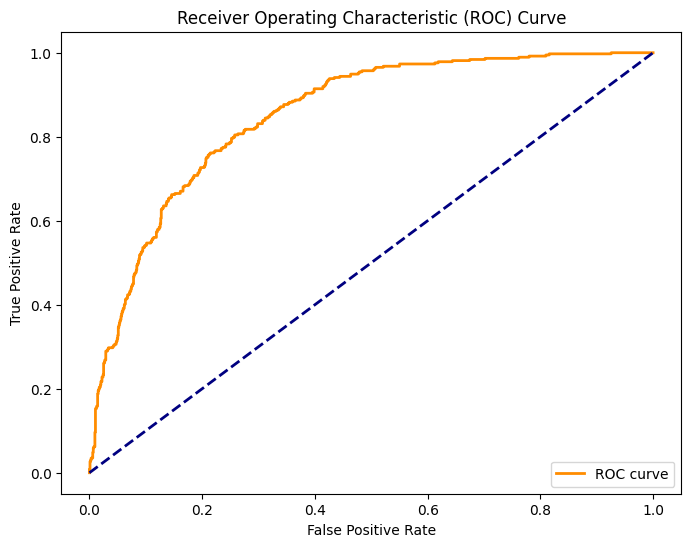

In [27]:
# Defining and training the Multi-Layer Perceptron model using the Functional API
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Keras Functional API model
input_layer = Input(shape=(x_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Obtaining predicted probabilities for test set
y_prob = model.predict(x_test)

# Evaluate the model on train and test sets
_, train_accuracy = model.evaluate(x_train, y_train)
_, test_accuracy = model.evaluate(x_test, y_test)
print(f'Train Accuracy: {train_accuracy*100:.4f}')
print(f'Test Accuracy: {test_accuracy*100:.4f}')


# Plotting ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



EVALUATING THE MODEL'S AUC SCORE

In [28]:
# Making predictions on the test set
y_prob = model.predict(x_test)
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

45/45 [==============================] - 0s 2ms/step
AUC Score: 0.8509877648617596


In [29]:
X_Corr=scaled.copy()

In [30]:
!pip install tensorflow scikeras scikit-learn

In [31]:
!pip install scikeras

In [32]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from sklearn.metrics import matthews_corrcoef
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [33]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

BALANCING THE DATA

In [34]:
# Initializing the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Applying random oversampling to the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)

# Printing the original and resampled class distribution
print("Original class distribution:", np.bincount(y_train))
print("Resampled class distribution:", np.bincount(y_train_resampled))

Original class distribution: [4138 1496]
Resampled class distribution: [4138 4138]


In [35]:
y_train.value_counts()

0    4138
1    1496
Name: Churn, dtype: int64

In [36]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [37]:
num_classes=1
epochs=30
batch_size=10

TRAINING USING FUNCTIONAL API

In [38]:
#Creating the model function
def create_model(dropout_rate, weight_constraint,neurons,activation):
  # create modeloptimizer=optimizer
  input_layer = Input(shape=(x_train.shape[1],))
  hidden_layer_1 = Dense(32, activation='relu')(input_layer)
  hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
  hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
  output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

  m=Model(inputs=input_layer, outputs=output_layer)

  m.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
  return m


In [39]:
#Creating the model
model = KerasClassifier(model=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
dropout_rate = [0.3, 0.5]
weight_constraint = [3.0, 5.0]
neurons = [20]
optimizer = ['SGD', 'Adam', 'RMSProp']
activation = ['relu']
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint,
                  model__neurons=neurons,model__activation=activation)

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv, scoring='accuracy')


# Initializing lists to store outer fold results
outer_scores = []
best_models = []

for train_idx, val_idx in outer_cv.split(X_train_resampled, y_train_resampled):
    X_train_outer, X_val_outer = X_train_resampled[train_idx], X_train_resampled[val_idx]
    y_train_outer, y_val_outer = y_train_resampled[train_idx], y_train_resampled[val_idx]

    # Perform hyperparameter tuning in the inner loop
    grid_search.fit(X_train_outer, y_train_outer)

    # Access the best estimator after fitting
    best_model = grid_search.best_estimator_

    best_models.append(best_model)

    # Evaluate the best model on the outer validation set
    y_pred_outer = best_model.predict(X_val_outer)
    accuracy = accuracy_score(y_val_outer, y_pred_outer)
    outer_scores.append(accuracy)

# Access the overall best estimator after the full search
final_best_model_mlp = grid_search.best_estimator_


CLASSIFICATION REPORT

In [40]:
from sklearn.metrics import classification_report

In [41]:
#Classification report
print("Outer CV Scores:", outer_scores)
print("Mean Accuracy:", np.mean(outer_scores))
print("Standard Deviation:", np.std(outer_scores))

# Train the final model on the entire training set with the best hyperparameters
final_best_model_mlp = grid_search.best_estimator_
print("The best estimator:",grid_search.best_estimator_, "\n")
final_best_model_mlp.fit(X_train_resampled, y_train_resampled,epochs=epochs, batch_size=batch_size, verbose=0)


Outer CV Scores: [0.7989130434782609, 0.7812688821752266, 0.7758308157099698, 0.777643504531722, 0.7782477341389729]
Mean Accuracy: 0.7823807960068304
Standard Deviation: 0.008449590897060818
The best estimator: KerasClassifier(
	model=<function create_model at 0x7ba43c566d40>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=30
	model__activation=relu
	model__dropout_rate=0.5
	model__neurons=20
	model__weight_constraint=3.0
	class_weight=None
) 



KerasClassifier(
	model=<function create_model at 0x7ba43c566d40>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=30
	model__activation=relu
	model__dropout_rate=0.5
	model__neurons=20
	model__weight_constraint=3.0
	class_weight=None
)

CALCULATING THE AUC SCORE

In [42]:
# Evaluating the model and obtaining predicted probabilities
y_pred = final_best_model_mlp.predict(x_test)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test, y_pred)
auc_mlp = round(metrics.roc_auc_score(y_test, y_pred), 4)
print("AUC:",auc_mlp)
y_pred=np.round(final_best_model_mlp.predict(x_test)).ravel()
print("\nCR by library method=\n",
          classification_report(y_test, y_pred))

AUC: 0.7409

CR by library method=
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1036
           1       0.50      0.75      0.60       373

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.74      0.75      1409



CALCULATING MODEL'S ACCURACY

In [43]:
from sklearn.metrics import accuracy_score

# Evaluating the model and obtaining predicted probabilities
y_pred = final_best_model_mlp.predict(x_test)

# Converting predicted probabilities to binary predictions (0 or 1)
y_pred_binary = np.round(y_pred).ravel()

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.7388218594748048


OPTIMIZING FURTHER TO ACHIEVE BETTER RESULTS

In [44]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
import numpy as np

# Defining my model creation function again for optimization
def create_model(dropout_rate, weight_constraint,neurons,activation):
  # create modeloptimizer=optimizer
  input_shape = (X_Corr.shape[1],)
  inputs = tf.keras.Input(shape=input_shape)
  input = tf.keras.layers.Dense((28)+neurons, activation=activation)(inputs)
  x= tf.keras.layers.Dropout(dropout_rate)(input)
  second=tf.keras.layers.Dense((12)+neurons, activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(second)
  third=tf.keras.layers.Dense((4)+neurons, activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(third)
  fourth=tf.keras.layers.Dense((-4)+neurons, activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(fourth)
  fifth=tf.keras.layers.Dense((-12)+neurons, activation=activation)(x)

# Adding output layer with softmax activation
  outputs = tf.keras.layers.Dense(num_classes, activation='sigmoid')(fifth)

# Creating the model
  m = tf.keras.Model(inputs=inputs, outputs=outputs)
  m.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
  return m

In [45]:
# Setting seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# Defining model and hyperparameter search space
model = KerasClassifier(model=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
dropout_rate = [0.3, 0.5]
weight_constraint = [3.0, 5.0]
neurons = [20]
optimizer = ['SGD', 'Adam', 'RMSProp']
activation = ['relu']
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint,
                  model__neurons=neurons, model__activation=activation)

# Defining cross-validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initializing lists to store outer scores and the best models
outer_scores = []
best_models = []

# Outer cross-validation loop
for train_idx, val_idx in outer_cv.split(X_train_resampled, y_train_resampled):
    X_train_outer, X_val_outer = X_train_resampled[train_idx], X_train_resampled[val_idx]
    y_train_outer, y_val_outer = y_train_resampled[train_idx], y_train_resampled[val_idx]

    # Inner cross-validation loop for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv, scoring='accuracy')
    grid_search.fit(X_train_outer, y_train_outer)

    # Accessing the best estimator after fitting
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # Evaluating the best model on the outer validation set
    y_pred_outer = best_model.predict(X_val_outer)
    accuracy = accuracy_score(y_val_outer, y_pred_outer)
    outer_scores.append(accuracy)

# Accessing the overall best estimator after the full search
final_best_model_f = best_models[np.argmax(outer_scores)]

In [46]:
grid_search.best_estimator_

KerasClassifier(
	model=<function create_model at 0x7ba445a5fd00>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=30
	model__activation=relu
	model__dropout_rate=0.3
	model__neurons=20
	model__weight_constraint=5.0
	class_weight=None
)

In [47]:
# Evaluating the model and obtaining predicted probabilities
y_pred = final_best_model_f.predict(x_test)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test, y_pred)
auc_mlp = round(metrics.roc_auc_score(y_test, y_pred), 4)
print("AUC:",auc_mlp)
y_pred=np.round(final_best_model_mlp.predict(x_test)).ravel()
print("\nCR by library method=\n",
          classification_report(y_test, y_pred))

AUC: 0.7731

CR by library method=
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1036
           1       0.50      0.75      0.60       373

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.74      0.75      1409



SAVING THE BEST MODEL

In [48]:
from keras.models import save_model

model = create_model(dropout_rate=0.3, weight_constraint=5.0, neurons=20, activation="relu")

# Manually setting the input names(This was to help in deployment. To get the right order)
model._name = 'my_model'
model._input_names = ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'Partner', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Save the model to a file
save_model(model, "best_model.h5")


<ipython-input-48-b244e53af246>:11: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, "best_model.h5")
